In [ ]:
pip install tabulate

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV

In [ ]:
df = pd.read_csv('/content/ClarificationTask_DevData_Oct22a.tsv', delimiter='\t')

# Display the first few rows of the dataframe

In [ ]:
df.head()

,Id,Resolved pattern,Article title,Section header,Previous context,Sentence,Follow-up context,Filler1,Filler2,Filler3,Filler4,Filler5
0,0,IMPLICIT REFERENCE,How to Detect Cleft Lip Early in Pregnancy,Treating Cleft Lip,1. Care for a newborn with a cleft lip. (....,2. Get surgery for ______ at 3 to 6 months old.,A pediatric surgeon will move the skin and mus...,the split,your chin,cleft lips,your baby,the ear
1,1,METONYMIC REFERENCE,How to Deal With Being Single and Feeling Lonely,Focusing on Yourself,(...) 3. Go on a trip. (...) 4. Get active an...,"If you are lonely, take up a new sport or ____...","This is great for your body, as well as your s...",freedom,circle,field,activity,form
2,2,FUSED HEAD,How to Cope With Anxiety and Depression,Seeking Professional Help,(...) 4. Allow medication time to work. If yo...,Most ______ take four to eight weeks to show a...,NaN,disorders,men,medications,people,procedures
3,3,FUSED HEAD,How to Be an Otaku (Anime Geek),Steps,1. Pick and watch some anime of your interest...,"If you want to have the edge over others, then...",2. Try watchingthe anime in the original Japan...,families,humans,men,people,females
4,4,METONYMIC REFERENCE,How to Uninstall Netflix on Samsung Smart TV,Steps,1. Press the Home button.,The home button is the button that resembles t...,This will open the Smart Hub.,video,interior,outline,movement,construction


# Checking for missing values

In [ ]:
missing_values = df.isnull().sum()

print("Missing values in each column:")
print(missing_values)

Missing values in each column:
Id                    0
Resolved pattern      0
Article title         0
Section header        0
Previous context      0
Sentence              0
Follow-up context    39
Filler1               0
Filler2               0
Filler3               0
Filler4               0
Filler5               0
dtype: int64


# Remove rows with missing values

In [ ]:

df_cleaned = df.dropna()

In [ ]:
# Verify that there are no missing values
missing_values_after_cleaning = df_cleaned.isnull().sum()
print("\nMissing values after cleaning:")
print(missing_values_after_cleaning)


Missing values after cleaning:
Id                   0
Resolved pattern     0
Article title        0
Section header       0
Previous context     0
Sentence             0
Follow-up context    0
Filler1              0
Filler2              0
Filler3              0
Filler4              0
Filler5              0
dtype: int64



# Display the first few rows of the cleaned datafram

In [ ]:
df_cleaned.head()

,Id,Resolved pattern,Article title,Section header,Previous context,Sentence,Follow-up context,Filler1,Filler2,Filler3,Filler4,Filler5
0,0,IMPLICIT REFERENCE,How to Detect Cleft Lip Early in Pregnancy,Treating Cleft Lip,1. Care for a newborn with a cleft lip. (....,2. Get surgery for ______ at 3 to 6 months old.,A pediatric surgeon will move the skin and mus...,the split,your chin,cleft lips,your baby,the ear
1,1,METONYMIC REFERENCE,How to Deal With Being Single and Feeling Lonely,Focusing on Yourself,(...) 3. Go on a trip. (...) 4. Get active an...,"If you are lonely, take up a new sport or ____...","This is great for your body, as well as your s...",freedom,circle,field,activity,form
3,3,FUSED HEAD,How to Be an Otaku (Anime Geek),Steps,1. Pick and watch some anime of your interest...,"If you want to have the edge over others, then...",2. Try watchingthe anime in the original Japan...,families,humans,men,people,females
4,4,METONYMIC REFERENCE,How to Uninstall Netflix on Samsung Smart TV,Steps,1. Press the Home button.,The home button is the button that resembles t...,This will open the Smart Hub.,video,interior,outline,movement,construction
5,5,METONYMIC REFERENCE,How to Draw a Human Figure from the Side,Steps,1.,Use a pencil to draw the ______ of a half circ...,This circle should be higher on the page as it...,section,top,walls,corners,points


In [ ]:
# Descriptive statistics for numerical columns
numerical_stats = df_cleaned.describe()

In [ ]:
df_cleaned

,Id,Resolved pattern,Article title,Section header,Previous context,Sentence,Follow-up context,Filler1,Filler2,Filler3,Filler4,Filler5,Sentence Length
0,0,2,How to Detect Cleft Lip Early in Pregnancy,Treating Cleft Lip,1. Care for a newborn with a cleft lip. (....,2. Get surgery for ______ at 3 to 6 months old.,A pediatric surgeon will move the skin and mus...,the split,your chin,cleft lips,your baby,the ear,48
1,1,3,How to Deal With Being Single and Feeling Lonely,Focusing on Yourself,(...) 3. Go on a trip. (...) 4. Get active an...,"If you are lonely, take up a new sport or ____...","This is great for your body, as well as your s...",freedom,circle,field,activity,form,62
3,3,1,How to Be an Otaku (Anime Geek),Steps,1. Pick and watch some anime of your interest...,"If you want to have the edge over others, then...",2. Try watchingthe anime in the original Japan...,families,humans,men,people,females,212
4,4,3,How to Uninstall Netflix on Samsung Smart TV,Steps,1. Press the Home button.,The home button is the button that resembles t...,This will open the Smart Hub.,video,interior,outline,movement,construction,83
5,5,3,How to Draw a Human Figure from the Side,Steps,1.,Use a pencil to draw the ______ of a half circ...,This circle should be higher on the page as it...,section,top,walls,corners,points,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,494,1,How to Build a Loving Relationship with Your M...,Steps,"1. Observe the real mood, character, likes an...",2. Build a real ______.,Your relationship starts when you know each ot...,happiness,family,fortress,communication,relationship,24
496,496,2,How to Make Water Potable with Stone Age Techn...,Steps,(...) 6. Build a fire. (...) Be patien...,7. Allow ______ to cool.,8. Put water in your pot.,it time,some clay,a person,the pot,the ceramic,25
497,497,1,How to Improve Social Skills in Children,Practicing Activities that Teach Social Skills,(...) 2. Have your kids play team sports. (.....,A great way to help your kid understand social...,Be respectful of others during your day-to-day...,skills,culture,processes,practice,motivation,97
498,498,3,How to Make a Beret,Making a Paper Beret for a Child,,1. Purchase ______ of crepe paper at your loca...,Pick out a mix of colorful paper.,container,quantity,copies,sections,sheets,82


# Evaluate the Machine Learning Model

In [ ]:
df_cleaned['Sentence Length'] = df_cleaned['Sentence'].apply(len)
df_cleaned['Resolved pattern'] = df_cleaned['Resolved pattern'].astype('category').cat.codes
X = df_cleaned['Sentence']
y = df_cleaned['Resolved pattern']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
vectorizer = TfidfVectorizer(max_features=1000, ngram_range=(1, 2))
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)
param_grid = {'C': [0.1, 1, 10, 100]}
grid_search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5)
grid_search.fit(X_train_tfidf, y_train)

# Print the best parameters found by grid search
print("Best Parameters:", grid_search.best_params_)

# Predict using the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_tfidf)


print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

<ipython-input-46-9cd896d9e2c8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Sentence Length'] = df_cleaned['Sentence'].apply(len)
<ipython-input-46-9cd896d9e2c8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Resolved pattern'] = df_cleaned['Resolved pattern'].astype('category').cat.codes


Best Parameters: {'C': 1}
Accuracy: 0.7204301075268817
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.40      0.50        25
           1       0.73      0.80      0.76        20
           2       0.67      0.80      0.73        25
           3       0.81      0.91      0.86        23

    accuracy                           0.72        93
   macro avg       0.72      0.73      0.71        93
weighted avg       0.71      0.72      0.71        93

Confusion Matrix:
 [[10  4  7  4]
 [ 1 16  2  1]
 [ 4  1 20  0]
 [ 0  1  1 21]]


# Visualize the confusion matrix


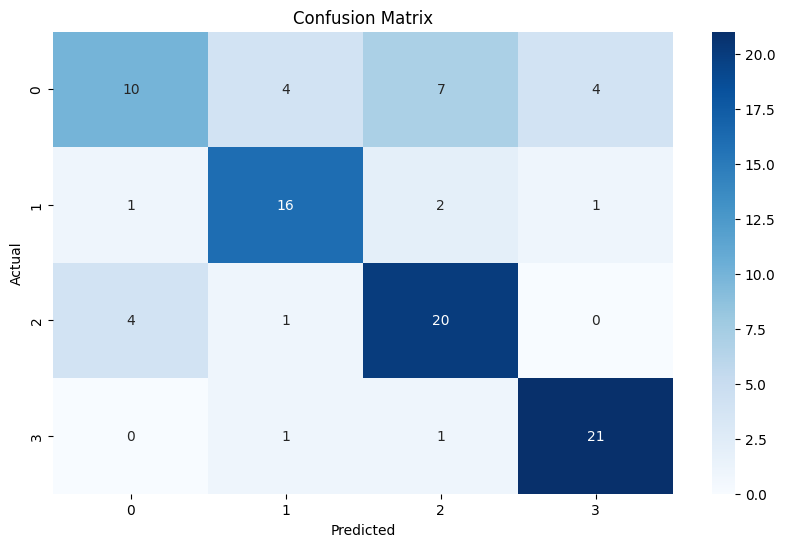

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [ ]:
from tabulate import tabulate

X_data = df_cleaned['Sentence']

X_data_tfidf = vectorizer.transform(X_data)

y_data_pred = best_model.predict(X_data_tfidf)

results_df = pd.DataFrame({
    'Sentence': X_data,
    'Resolved Pattern': y_data_pred
})

results_df_concise = results_df.head(10)

table = tabulate(results_df_concise, headers='keys', tablefmt='pretty')

print("Predicted Results for Plausible Clarifications Related Solutions (First 10 rows):")
print(table)


Predicted Results for Plausible Clarifications Related Solutions (First 10 rows):
+----+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+------------------+
|    |                                                                                                      Sentence                                                                                                       | Resolved Pattern |
+----+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+------------------+
| 0  |                                                                                   2. Get surgery for ______ at 3 to 6 months old.                                                              